In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pickle
import re
import datetime

import keras
import tensorflow as tf

Using TensorFlow backend.


## Open and preprocess text

In [3]:
with open("data/moliere_1_clean.txt",encoding='utf-8') as f1:
    moliere_1 = f1.read()
with open("data/moliere_2_clean.txt",encoding='utf-8') as f2:
    moliere_2 = f2.read()
with open("data/moliere_3_clean.txt",encoding='utf-8') as f3:
    moliere_3 = f3.read()

In [4]:
text = moliere_1 + ' ' + moliere_2 + ' ' + moliere_3
len(text)

1275253

### Remove special characters

In [5]:
text = text.replace('œ','oe')
text = text.replace('æ','ae')
text = text.replace('î','i')
text = text.replace('ï','i')
text = text.replace('º','')
text = text.replace('_','')
text = text.replace('ñ','n')
text = text.replace('λ','')
text = text.replace('ο','')
text = text.replace('ρ','')
text = text.replace('ς','')
text = text.replace('φ','')
text = text.replace('β','')
text = text.replace('ε','')
text = text.replace('ι','')

text = text.replace('É','E')
text = text.replace('È','E')
text = text.replace('Ê','E')
text = text.replace('Ç','C')

text = text.replace('\n',' ')

text = re.sub(r'( )+',' ',text) #remove multiple spaces

text[:100]

'Eh bien, Sabine, quel conseil me donnes-tu? Vraiment, il y a bien des nouvelles. Mon oncle veut réso'

In [6]:
character_list = sorted(set(text))
N_char = len(character_list)

print('Length of vocab:',N_char)
print(character_list)

Length of vocab: 86
[' ', '!', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '«', '»', 'à', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'ô', 'ù', 'û']


### Tokenize text

In [7]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text)

In [8]:
max([len(sent) for sent in sentences])

1234

### Encode characters

In [9]:
char2code = {}
for k, word in enumerate(character_list):
    char2code[word] = k
    
print(char2code)

{' ': 0, '!': 1, "'": 2, '(': 3, ')': 4, ',': 5, '-': 6, '.': 7, '0': 8, '1': 9, '2': 10, '3': 11, '4': 12, '5': 13, '6': 14, '7': 15, '8': 16, '9': 17, ':': 18, ';': 19, '?': 20, 'A': 21, 'B': 22, 'C': 23, 'D': 24, 'E': 25, 'F': 26, 'G': 27, 'H': 28, 'I': 29, 'J': 30, 'K': 31, 'L': 32, 'M': 33, 'N': 34, 'O': 35, 'P': 36, 'Q': 37, 'R': 38, 'S': 39, 'T': 40, 'U': 41, 'V': 42, 'X': 43, 'Y': 44, 'Z': 45, '[': 46, ']': 47, 'a': 48, 'b': 49, 'c': 50, 'd': 51, 'e': 52, 'f': 53, 'g': 54, 'h': 55, 'i': 56, 'j': 57, 'k': 58, 'l': 59, 'm': 60, 'n': 61, 'o': 62, 'p': 63, 'q': 64, 'r': 65, 's': 66, 't': 67, 'u': 68, 'v': 69, 'w': 70, 'x': 71, 'y': 72, 'z': 73, '«': 74, '»': 75, 'à': 76, 'â': 77, 'ç': 78, 'è': 79, 'é': 80, 'ê': 81, 'ë': 82, 'ô': 83, 'ù': 84, 'û': 85}


In [10]:
code2char = {v:k for k,v in char2code.items()}
print(code2char)

{0: ' ', 1: '!', 2: "'", 3: '(', 4: ')', 5: ',', 6: '-', 7: '.', 8: '0', 9: '1', 10: '2', 11: '3', 12: '4', 13: '5', 14: '6', 15: '7', 16: '8', 17: '9', 18: ':', 19: ';', 20: '?', 21: 'A', 22: 'B', 23: 'C', 24: 'D', 25: 'E', 26: 'F', 27: 'G', 28: 'H', 29: 'I', 30: 'J', 31: 'K', 32: 'L', 33: 'M', 34: 'N', 35: 'O', 36: 'P', 37: 'Q', 38: 'R', 39: 'S', 40: 'T', 41: 'U', 42: 'V', 43: 'X', 44: 'Y', 45: 'Z', 46: '[', 47: ']', 48: 'a', 49: 'b', 50: 'c', 51: 'd', 52: 'e', 53: 'f', 54: 'g', 55: 'h', 56: 'i', 57: 'j', 58: 'k', 59: 'l', 60: 'm', 61: 'n', 62: 'o', 63: 'p', 64: 'q', 65: 'r', 66: 's', 67: 't', 68: 'u', 69: 'v', 70: 'w', 71: 'x', 72: 'y', 73: 'z', 74: '«', 75: '»', 76: 'à', 77: 'â', 78: 'ç', 79: 'è', 80: 'é', 81: 'ê', 82: 'ë', 83: 'ô', 84: 'ù', 85: 'û'}


### One-hot encoding

In [11]:
#from keras.utils.np_utils import to_categorical

#categorical_labels = to_categorical(int_labels, num_classes=None)

In [12]:
def one_hots(sequence, vocab_size=N_char):
    result = np.zeros((len(sequence), vocab_size))
    for k,s in enumerate(sequence):
        idx = char2code[s]
        result[k, idx] = 1
    return result

In [13]:
def textify(embedding,character_list = character_list):
    result = ""
    indices = np.argmax(embedding, axis=1)
    for idx in indices:
        result += character_list[int(idx)]
    return result

### Prepare dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
raw = one_hots(text)
raw.shape

(1274945, 86)

In [16]:
window_size = 64
step = 16
L = raw.shape[0]

x,y = [], []
for k in np.arange(window_size,L,step):
    #print(k,k+window_size)
    x.append(raw[k-window_size:k,:])  #Up until (but excluding) k
    y.append(raw[k,:])

In [17]:
X = np.array(x)
Y = np.array(y)
print(X.shape,Y.shape)

(79681, 64, 86) (79681, 86)


In [18]:
# Cleaning up
del x, y, raw

In [19]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,train_size=0.7,shuffle=False)
print(Xtrain.shape,Ytrain.shape,Xtest.shape, Ytest.shape)

(55776, 64, 86) (55776, 86) (23905, 64, 86) (23905, 86)


In [20]:
N_samples = X.shape[0]
N_samples

79681

## Keras model

### Core model

In [21]:
from keras.models import Sequential, load_model
from keras.optimizers import RMSprop, Adam
from keras.layers import Dense, GRU, Embedding, Dropout, LSTM
from keras.layers.wrappers import TimeDistributed
from keras.callbacks import ModelCheckpoint,TensorBoard, Callback

#from sklearn.metrics import mean_squared_error

In [22]:
model = Sequential()
model.add(LSTM(256, input_shape=(window_size, N_char),recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(N_char, activation='softmax'))

adam_optimizer = Adam(lr=0.01, decay=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               351232    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 86)                22102     
Total params: 373,334
Trainable params: 373,334
Non-trainable params: 0
_________________________________________________________________


In [23]:
#model = load_model('output/saveState.h5')

In [49]:
def my_fit(model,X,Y,**kwargs):
    
    # Train model and output new history
    new_hist = model.fit(X,Y,**kwargs)
    
    # Update new history with data from the old one
    try:
        # Update metrics
        for k,v in history.history.items():
            hist.history[k] = history.history[k] + new_hist.history[k]
    except:
        pass
    
    # Update epochs
    new_hist.epoch = list(range(len(new_hist.history['acc'])))
    
    return model, new_hist

In [50]:
class KeepHistory(Callback):
    
    def __init__(self,path):
        self.path = path
        
    def on_train_begin(self,logs={}):
        self.start = datetime.datetime.now()

    def on_train_end(self,epoch,logs={}):
        with open(self.path+' [{:%Y-%m-%d_%Hh%M}].txt'.format(self.start),'a') as file:
            loss = self.model.history.history['loss']
            val_loss = self.model.history.history['val_loss']
            acc = self.model.history.history['acc']
            val_acc = self.model.history.history['val_acc']
            epochs = self.model.history.epoch
            for e,l,vl,a,va in zip(epochs,loss,val_loss,acc,val_acc):
                file.write('Epoch {:03d} | Train_loss {:.3f} | Val_loss {:.3f} | Train_acc {:.3f} | Val_acc {:.3f}\n'.format(e+1,l,vl,a,va));

In [80]:
class LoadPreviousModel(Callback):
    
    def __init__(self,reload=True):
        self.reload = reload
        
    def on_train_begin(self,logs={}):
        if self.reload:
            pass
            #?
            #?
            #?
            #?
            #?
            #?
            #?
            #?
            #?
            #?
            #?
            #?
            #?
            #?

In [98]:
class LiveTensorboard(TensorBoard):

    def on_train_begin(self,logs={}):
        now = datetime.datetime.now()
        self.log_dir = self.log_dir+'{:%Y-%m-%d_%Hh%M}'.format(now)

In [102]:
# Callback1 : checkpoint
filepath="weights-keras.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# Callback 2: tensorboard with a tweak
tb_logger = LiveTensorboard()

# Callback3 : custom history logger
history_logger = KeepHistory('logs/keras_log')

# Pass them as a list
callbacks_list = [checkpoint,tb_logger,history_logger]

In [ ]:
#history = model.fit(Xtrain, Ytrain, batch_size=256, epochs=3, validation_data=(Xtest,Ytest),callbacks=callbacks_list)
B = 128#np.inf
tb_logger.log_dir = 'logs/{:%Y-%m-%d_%Hh%M}'.format(datetime.datetime.now())
model, history = my_fit(model,Xtrain[:B*5],Ytrain[:B*5], batch_size=256, epochs=20, validation_data=(Xtest[:B],Ytest[:B]),callbacks=callbacks_list)

Train on 640 samples, validate on 128 samples


### Save and recover state

In [ ]:
import json

In [264]:
model.save('output/saveState.h5')

with open('output/history.json', 'w') as f:
    json.dump(history.history, f)

In [265]:
model = load_model('output/saveState.h5')

with open('output/history.json') as f:
    history_dic = json.load(f)

### Helper functions

In [147]:
from keras.preprocessing.sequence import pad_sequences

In [148]:
def predict_next(prefix):
    L = len(prefix)
    temp = np.zeros(shape=(window_size,N_char))
    temp[-L:,:] = one_hots(prefix)[-window_size:]
    return model.predict(temp.reshape(1,-1,N_char)).squeeze()

In [149]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    #preds = np.log(preds) / temperature
    #exp_preds = np.exp(preds)
    exp_preds = preds * np.exp(-temperature)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)

    return np.argmax(probas)

In [150]:
def multi_sample(prefix,n=10,temperature=1.0):
    result = []
    for _ in range(n):
        this = sample(predict_next(prefix),temperature=temperature)
        this = code2char[this]
        result.append(this)
        prefix+=this
    return result

In [151]:
def predict_following(prefix,n=20,temperature=1.0):
    return prefix + ''.join(multi_sample(prefix,n,temperature))

In [258]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import seaborn as sns
%matplotlib inline

def plot_history(history, metrics = ['loss','acc'],style='default',figsize=(16, 6)):
    # Define style
    mpl.style.use(style)
    palette = itertools.cycle(sns.color_palette()) 
    
    # Define figure    
    N = len(metrics)
    fig, axes = plt.subplots(N,sharex=True,figsize=figsize);  
    
    # Plot all metrics
    for ax,m in zip(axes,metrics):

        c = next(palette)
        ax.plot(history[m],'.-',c=c,label='train_'+m)
        
        c = next(palette)
        ax.plot(history['val_'+m],'.-',c=c,label='validation_'+m)
        
        ax.legend();
        if style=='default':
            ax.grid();

### Test and visualization

In [244]:
for temp in [0.05,0.1,0.2,0.5,1,2]:
    print('Temp:',temp,'\t',predict_following('Bonjour cher ami, que je suis heureux de vo',temperature=temp,n=60))

Temp: 0.05 	 Bonjour cher ami, que je suis heureux de vous affint. Mais suin les qui d'un cire espsommoit cois un bi
Temp: 0.1 	 Bonjour cher ami, que je suis heureux de vouloort, embeaudes trembre Pour dis une recoces de pamenié da
Temp: 0.2 	 Bonjour cher ami, que je suis heureux de votre tevant est sortes cet aminte compnire et de vous nous m'
Temp: 0.5 	 Bonjour cher ami, que je suis heureux de voilà autresses à t'et vous soncie. mèt DUnt faite sant det on
Temp: 1 	 Bonjour cher ami, que je suis heureux de vos pendre, Ces homme emtait de comme et et, par là pesce nous
Temp: 2 	 Bonjour cher ami, que je suis heureux de vous point un voulez grands en races pour moi, je une Sars de 


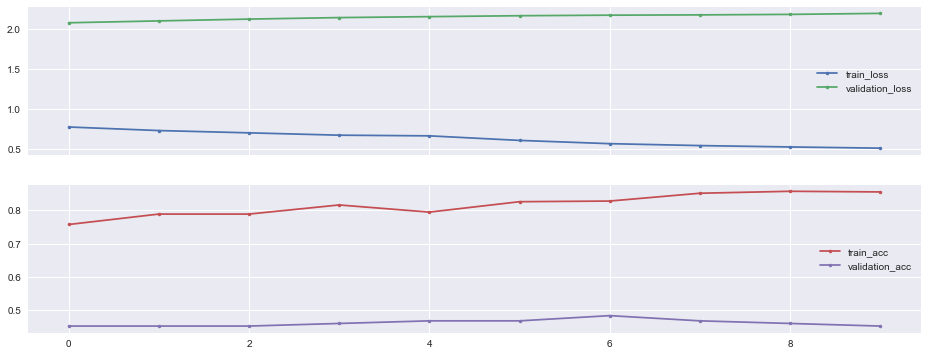

In [271]:
plot_history(history_dic,style='seaborn')